# Final Project Results and Metrics

In [9]:
import random
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import numpy as np
import ast
#import the models
import baseline
import nn_with_rules
import base_nn



random.seed(0) # set a seed for reproducibility

### Run Models or Load in from output


In [10]:
baseline_output = "output/baseline_test.csv"
base_nn_output = "output/base_nn_test.csv"
nn_with_rules_output = "output/nn_with_rules_test_2.csv"

num_iters = 20 # number of times to run the baseline model if not loading it in

#get baseline (just rules based results)
if os.path.exists(baseline_output):
    baseline_df = pd.read_csv(baseline_output)
else:
    baseline_df= baseline.run_baseline(num_iters)
#get base_nn results
if os.path.exists(base_nn_output):
    base_nn_df = pd.read_csv(base_nn_output)
else:
    base_nn_df = base_nn.run_base_nn()
#get nn_with_rules results
if os.path.exists(nn_with_rules_output):
    nn_with_rules_df = pd.read_csv(nn_with_rules_output)
else:
    nn_with_rules_df = nn_with_rules.run_nn_with_rules()

baseline_df['y_pred'] = baseline_df['y_pred'].apply(ast.literal_eval)#this is a list of the output over x num of runs so treat it like a list
 

### Make sure that the results dfs are comparable

In [11]:
print(baseline_df.shape) # TODO: figure out why they aren't the same size, doing a different preprocessing approach for this
print(base_nn_df.shape)
print(nn_with_rules_df.shape)

print(baseline_df.columns)

(65, 21)
(65, 21)
(65, 21)
Index(['Unnamed: 0.2', 'Unnamed: 0', 'file', 'sent_i', 'sent', 'ne_info',
       'amr_graph', 'amr_head_name', 'amr_tail_name', 'amr_role',
       'umr_head_name', 'umr_tail_name', 'umr_role', 'amr_head_id',
       'umr_head_id', 'amr_tail_id', 'umr_tail_id', 'Unnamed: 0.1', 'y_guess',
       'y_guess_dist', 'y_pred'],
      dtype='object')


In [12]:
print("BASELINE (20x iterations)")
print(baseline_df["y_pred"][0:5])

print("BASE NN")
print(base_nn_df["y_pred"][0:5])

print("NN with RULES")
print(nn_with_rules_df["y_pred"][0:5])


BASELINE (20x iterations)
0    [:condition, :condition, :condition, :conditio...
1    [:mod, :mod, :mod, :mod, :mod, :mod, :mod, :mo...
2    [:mod, :mod, :mod, :mod, :mod, :mod, :mod, :mo...
3    [:mod, :mod, :mod, :mod, :mod, :mod, :mod, :mo...
4    [:mod, :mod, :mod, :mod, :mod, :mod, :mod, :mo...
Name: y_pred, dtype: object
BASE NN
0    :condition
1          :mod
2          :mod
3          :mod
4          :mod
Name: y_pred, dtype: object
NN with RULES
0    :condition
1          :mod
2          :mod
3          :mod
4          :mod
Name: y_pred, dtype: object


In [13]:
def get_accuracy(df):
    # Extract values from DataFrame columns
    y_true = df['umr_role'].values
    y_preds_list = df['y_pred'].values

    # Calculate accuracy

    if type(y_preds_list[0]) == list:
        y_preds_transposed = list(map(list, zip(*y_preds_list)))
        
        # Compute accuracy for each set of predictions
        accuracies = [accuracy_score(y_true, y_preds) for y_preds in y_preds_transposed]
        

        # Compute average accuracy
        accuracy = np.mean(accuracies) 
    else:
        accuracy = accuracy_score(y_true, y_preds_list)
        print(confusion_matrix(y_preds_list,y_true))
    return accuracy

total_acc = {"baseline": get_accuracy(baseline_df),
             "base_nn": get_accuracy(base_nn_df),
             "nn with rules": get_accuracy(nn_with_rules_df)}

print(total_acc)

[[ 0  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  3  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 46  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6]]
[[ 1  0  0  0  0  0  0  4  0]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 46  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6]]
{'baseline': 0.8284615384615386, 'base_nn': 0.8769230769230769, 'nn with rules': 0.8769230769230769}


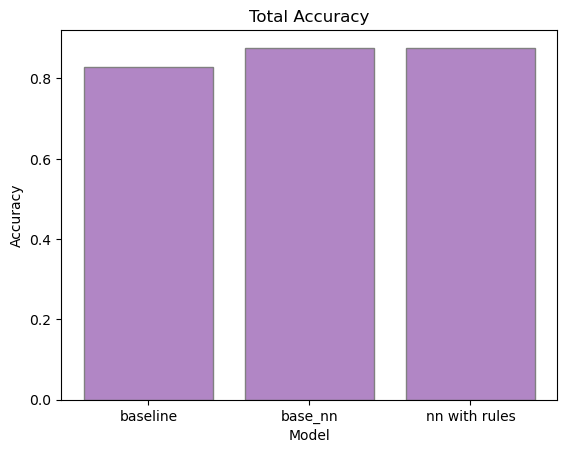

In [14]:
def plot_dict(data, title):
    # Extract x and y values from the dictionary
    x_values = list(data.keys())
    y_values = list(data.values())

    color_model1 = '#B186C5'  # Purple

    # Plotting
    plt.bar(x_values, y_values, color=color_model1, edgecolor='grey')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.show()

plot_dict(total_acc, "Total Accuracy")


In [15]:
def get_per_class_f1(df):
    y_true = df["umr_role"]
    y_pred = df["y_pred"]

    if type(y_pred[0]) == list: #baseline with 20 runs, get the average per class f1
        y_preds_transposed = list(map(list, zip(*y_pred)))
        
        f1_dicts = {}
        for i in range(len(y_preds_transposed)):
            report = classification_report(y_true, y_preds_transposed[i], output_dict = True,zero_division=0.0)
            
            class_labels = [label for label in report.keys()]
            f1_scores = []
            for label in class_labels:
                if label[0] == ":":
                    f1_scores.append(report[label]['f1-score'])
            f1_dict = dict(zip(class_labels, f1_scores))
            f1_dicts[i] = f1_dict

        #make sure they all have the same keys:
            # Find the union of all keys in the interior dictionaries
        all_keys = set().union(*f1_dicts.values())

        # Update each interior dictionary with missing keys, assigning them a value of 0
        for entry in f1_dicts.values():
            for key in all_keys:
                entry.setdefault(key, 0)
        
        averages_dict = {}
        # Iterate over the keys ('cause' and 'reason')
        for key in f1_dicts[0].keys():
            # Calculate the average for each key
            average_value = np.mean([entry[key] for entry in f1_dicts.values()])
            # Store the result in the averages_dict
            averages_dict[key] = average_value
        
        f1_dict = averages_dict
        
    else:
        report = classification_report(y_true, y_pred, output_dict = True,zero_division=0.0)
        print(classification_report(y_true, y_pred, zero_division=0.0))
        class_labels = [label for label in report.keys()]
        f1_scores = []
        for label in class_labels:
            if label[0] == ":":
                f1_scores.append(report[label]['f1-score'])
        
        f1_dict = dict(zip(class_labels, f1_scores))

    #hand remove umr-roles that are predicted but are wrong
    if ":start"  in f1_dict:
       del f1_dict[":start"]
    if ":Cause-of"  in f1_dict:
       del f1_dict[":Cause-of"]

  #  if ":Material-of" not in f1_dict:
    #    f1_dict[":Material-of"] = 0

    print(len(f1_dict.keys()), f1_dict.keys())
    return f1_dict
    

print(get_per_class_f1(base_nn_df))
print(get_per_class_f1(nn_with_rules_df))
print(get_per_class_f1(baseline_df))

    

              precision    recall  f1-score   support

   :Cause-of       0.00      0.00      0.00         0
      :cause       0.25      1.00      0.40         1
  :condition       1.00      1.00      1.00         1
       :goal       1.00      1.00      1.00         2
   :material       0.00      0.00      0.00         1
        :mod       0.92      1.00      0.96        46
 :other-role       0.00      0.00      0.00         3
       :part       1.00      1.00      1.00         1
     :reason       0.00      0.00      0.00         4
     :source       1.00      1.00      1.00         6

    accuracy                           0.88        65
   macro avg       0.52      0.60      0.54        65
weighted avg       0.81      0.88      0.84        65

9 dict_keys([':cause', ':condition', ':goal', ':material', ':mod', ':other-role', ':part', ':reason', ':source'])
{':cause': 0.4, ':condition': 1.0, ':goal': 1.0, ':material': 0.0, ':mod': 0.9583333333333334, ':other-role': 0.0, ':part': 1.0

              precision    recall  f1-score   support

   :Cause-of       0.00      0.00      0.00         0
      :cause       0.25      1.00      0.40         1
  :condition       1.00      1.00      1.00         1
       :goal       1.00      1.00      1.00         2
   :material       0.00      0.00      0.00         1
        :mod       0.92      1.00      0.96        46
 :other-role       0.00      0.00      0.00         3
       :part       1.00      1.00      1.00         1
     :reason       0.00      0.00      0.00         4
     :source       1.00      1.00      1.00         6

    accuracy                           0.88        65
   macro avg       0.52      0.60      0.54        65
weighted avg       0.81      0.88      0.84        65

9 dict_keys([':cause', ':condition', ':goal', ':material', ':mod', ':other-role', ':part', ':reason', ':source'])
              precision    recall  f1-score   support

      :cause       0.20      1.00      0.33         1
  :condition      

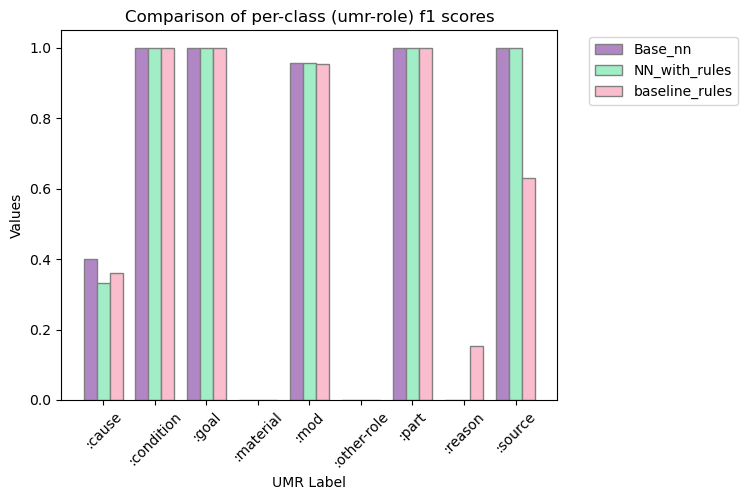

In [16]:
def plot_dicts(model1, model2, model3):


    # Extract keys and values
    keys = list(model1.keys())
    values_model1 = list(model1.values())
    values_model2 = list(model2.values())
    values_model3 = list(model3.values())

    # Set the width of the bars
    bar_width = 0.25

    # Set the positions for the bars on the x-axis
    r1 = range(len(keys))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    color_model1 = '#B186C5'  # Purple
    color_model2 = '#A0EDC6'  # Pink
    color_model3 = '#FABDCD'  # Green

    # Plotting
    plt.bar(r1, values_model1, color=color_model1, width=bar_width, edgecolor='grey', label='Base_nn')
    plt.bar(r2, values_model2, color=color_model2, width=bar_width, edgecolor='grey', label='NN_with_rules')
    plt.bar(r3, values_model3, color=color_model3, width=bar_width, edgecolor='grey', label='baseline_rules')

    # Add x-axis labels, y-axis label, and title
    plt.xlabel('UMR Label')
    plt.ylabel('Values')
    plt.title('Comparison of per-class (umr-role) f1 scores')
    plt.xticks([r + bar_width for r in range(len(keys))], keys, rotation = 45)

    # Add legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.show()

plot_dicts(get_per_class_f1(base_nn_df),get_per_class_f1(nn_with_rules_df),get_per_class_f1(baseline_df))


10 dict_keys([':Material-of', ':cause', ':goal', ':group', ':material', ':mod', ':part', ':reason', ':source', ':other-role'])
{':Material-of': 0.0, ':cause': 0.5727777777777777, ':goal': 0.8000000000000002, ':group': 0.565, ':material': 0.6650541125541125, ':mod': 0.9952380952380953, ':part': 0.0, ':reason': 0.6249999999999999, ':source': 0.45263791763791755, ':other-role': 0.0}


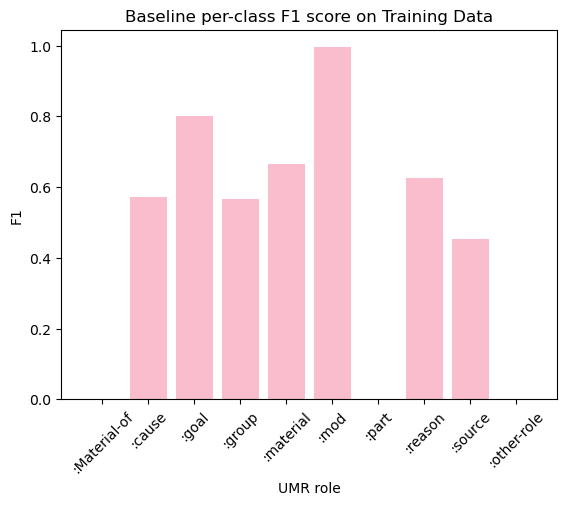

In [33]:
#plot trained data of baseline (rules only)
baseline_train_df = pd.read_csv("output/baseline_train.csv")
baseline_train_df['y_pred'] = baseline_train_df['y_pred'].apply(ast.literal_eval)

train_dict = get_per_class_f1(baseline_train_df)
print(train_dict)

x_values = list(train_dict.keys())
y_values = list(train_dict.values())
# Plot the data
plt.bar(x_values, y_values ,color =  '#FABDCD'  )# Purple

# Add labels and title
plt.xlabel('UMR role')
plt.ylabel('F1')
plt.title('Baseline per-class F1 score on Training Data')

plt.xticks( x_values, rotation = 45)

# Show the plot
plt.show()



## Dataset Information

In [35]:
#test data
test_data = pd.read_csv("input_data/test_data.csv")
train_data = pd.read_csv("input_data/train_data.csv")
print(test_data.columns)
file_counts = test_data["file"].value_counts()
value_counts = test_data["umr_role"].value_counts()
print(file_counts)
print(value_counts)

file_counts = train_data["file"].value_counts()
value_counts = train_data["umr_role"].value_counts()
print(file_counts)
print(value_counts)


# file_map = {1:"Lindsay",2: "Landslide", 3:"Putin",4:"Edmund Pope", 5:"Pear Story"}

Index(['Unnamed: 0', 'file', 'sent_i', 'sent', 'ne_info', 'amr_graph',
       'amr_head_name', 'amr_tail_name', 'amr_role', 'umr_head_name',
       'umr_tail_name', 'umr_role', 'amr_head_id', 'umr_head_id',
       'amr_tail_id', 'umr_tail_id'],
      dtype='object')
file
2    36
5    30
3    15
4     9
1     1
Name: count, dtype: int64
umr_role
:mod           46
:source         6
:reason         4
:ARG1           4
:extent         3
:other-role     3
:goal           2
:condition      1
:path           1
:material       1
:cause          1
:ARG0-of        1
:ARG1-of        1
:part           1
Name: count, dtype: int64
file
AMR to UMR targerted conversion split roles - Graphs.csv    50
Name: count, dtype: int64
umr_role
:mod            11
:source          5
:goal            4
:start           4
:reason          4
:cause           4
:material        4
:Cause-of        2
:group           2
:instrument      1
:Material-of     1
:undergoer       1
Name: count, dtype: int64


# Error Analysis
Using k-fold validation (k =5) we run the baseline, base_nn,  and combined nn, training on 4 and then testing on 1. We then examine the accuracies and confusion matricies. We look at the output layer weights of the combined nn to see how much we are rating the rules and how much we are rating the nn output

In [ ]:
import error_analysis

In [ ]:
## BASELINE